# P2: Investigate a Dataset
## Titanic Data

For my second project, I have decided to analyze the Titanic data from [Kaggle](https://www.kaggle.com/c/titanic/data). Brainstorming for questions to ask about the data, I came up with the following questions to look further into:

* Were passengers more or less likely to survive depending on
  * Age
  * Gender
  * Passenger class

In [1]:
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
titanic_data = pd.read_csv('titanic_data.csv')

# Get some basic statistics on the data
titanic_data.describe()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Right off the bat we can see a few things:
* There are only ages listed for 714 of 891 passengers in the data set
* 75% of the passengers with age listed were under the age of 38, and the mean age overall was 29.7
* 38% of the passengers survived
* 75% passengers paid \$31 or less for the fare
* The largest fare was \$512.33

## Survival Based On:
### Age
The first question was whether age had any relation to survival. For example, were children and elderly more likely to survive?

First, here are some descriptive statistics:

In [2]:
survival_group = titanic_data.groupby('Survived')

survival_group.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.626179   22.117887    0.329690   447.016393    2.531876   
         std     14.172110   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.854200    0.000000   211.000000    2.000000   
         50%     28.000000   10.500000    0.000000   455.000000    3.000000   
         75%     39.000000   26.000000    0.000000   675.000000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.343690   48.395408    0.464912   444.368421    1.950292   
         std     14.950952   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   12.475000    0.000000   250.750000    1.000000   
         50%     28.000000   26.000000    0.000000   439.500000    2.000000   
         75%     36.000000   57.000000    1.000000   651.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  549.000000  
         mean     0.553734  
         std      1.288399  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      8.000000  
1        count  342.000000  
         mean     0.473684  
         std      0.708688  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

It turns out that the mean age of survivors and non-survivors was very close. And with a standard deviation of about 14, the mean age for each group is well within one standard deviation of the other group, meaning that the difference in mean ages is not statistically significant.

A look at the histograms of the ages of each group would also suggest that age did not seem to be a significant deciding factor:

In [3]:
def get_survived_non_survived(data, attrib):
    '''Returns 2 Series of attrib data: one for survivors and one for non-survivors.
    '''
    # Uses .dropna() in order to clean data by leaving out NaNs
    non_survived = data[data['Survived'] == 0][attrib].dropna()
    survived = data[data['Survived'] == 1][attrib].dropna()
    return non_survived, survived

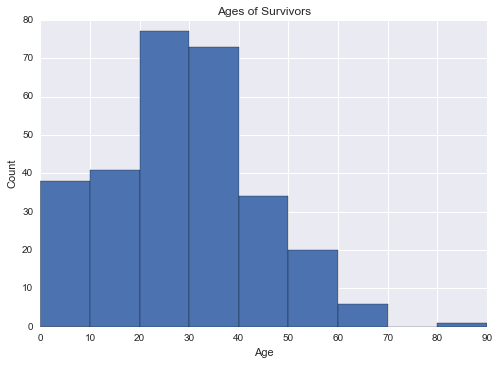

In [4]:
non_survived_ages, survived_ages = get_survived_non_survived(titanic_data, 'Age')

plt.hist(survived_ages.values, bins=np.arange(0,100,10))
plt.title('Ages of Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

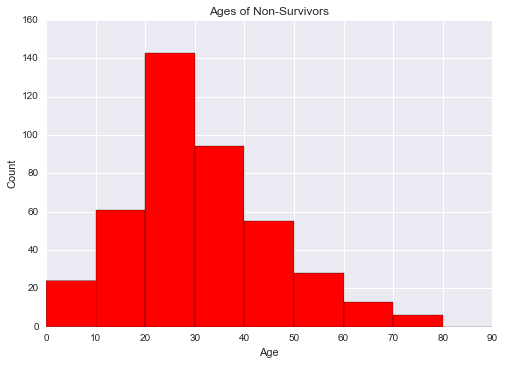

In [5]:
plt.hist(non_survived_ages.values, facecolor='r', bins=np.arange(0,100,10))
plt.title('Ages of Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

### Gender
Next is to look at weather gender played a role in survival. We will start with the statistics we saw before:

In [6]:
survival_group.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.626179   22.117887    0.329690   447.016393    2.531876   
         std     14.172110   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.854200    0.000000   211.000000    2.000000   
         50%     28.000000   10.500000    0.000000   455.000000    3.000000   
         75%     39.000000   26.000000    0.000000   675.000000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.343690   48.395408    0.464912   444.368421    1.950292   
         std     14.950952   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   12.475000    0.000000   250.750000    1.000000   
         50%     28.000000   26.000000    0.000000   439.500000    2.000000   
         75%     36.000000   57.000000    1.000000   651.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  549.000000  
         mean     0.553734  
         std      1.288399  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      8.000000  
1        count  342.000000  
         mean     0.473684  
         std      0.708688  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

It looks like gender is not included in these statistics because the values for gender are all strings. Let's make sure we only have two values for gender and clean up the data if we find more.

In [7]:
np.unique(titanic_data['Sex'].values)

array(['female', 'male'], dtype=object)

Next, we will group the data by both gender and survival and see what statistics we find.

In [8]:
survival_gender_group = titanic_data.groupby(['Survived', 'Sex'])

survival_gender_group.describe()

Age        Fare       Parch  PassengerId  \
Survived Sex                                                             
0        female count   64.000000   81.000000   81.000000    81.000000   
                mean    25.046875   23.024385    1.037037   434.851852   
                std     13.618591   24.821287    1.391442   263.522063   
                min      2.000000    6.750000    0.000000    15.000000   
                25%     16.750000    8.850000    0.000000   206.000000   
                50%     24.500000   15.245800    0.000000   420.000000   
                75%     33.250000   27.900000    2.000000   643.000000   
                max     57.000000  151.550000    6.000000   889.000000   
         male   count  360.000000  468.000000  468.000000   468.000000   
                mean    31.618056   21.960993    0.207265   449.121795   
                std     14.056019   32.409799    0.601382   260.365260   
                min      1.000000    0.000000    0.000000     1.000000   
                25%     21.750000    7.795800    0.000000   212.500000   
                50%     29.000000    9.416650    0.000000   461.000000   
                75%     39.250000   26.000000    0.000000   678.500000   
                max     74.000000  263.000000    5.000000   891.000000   
1        female count  197.000000  233.000000  233.000000   233.000000   
                mean    28.847716   51.938573    0.515021   429.699571   
                std     14.175073   64.102256    0.820527   255.048296   
                min      0.750000    7.225000    0.000000     2.000000   
                25%     19.000000   13.000000    0.000000   238.000000   
                50%     28.000000   26.000000    0.000000   400.000000   
                75%     38.000000   76.291700    1.000000   636.000000   
                max     63.000000  512.329200    5.000000   888.000000   
         male   count   93.000000  109.000000  109.000000   109.000000   
                mean    27.276022   40.821484    0.357798   475.724771   
                std     16.504803   71.355967    0.645826   244.717482   
                min      0.420000    0.000000    0.000000    18.000000   
                25%     18.000000    9.500000    0.000000   272.000000   
                50%     28.000000   26.287500    0.000000   508.000000   
                75%     36.000000   39.000000    1.000000   680.000000   
                max     80.000000  512.329200    2.000000   890.000000   

                           Pclass       SibSp  
Survived Sex                                   
0        female count   81.000000   81.000000  
                mean     2.851852    1.209877  
                std      0.450309    1.814635  
                min      1.000000    0.000000  
                25%      3.000000    0.000000  
                50%      3.000000    1.000000  
                75%      3.000000    1.000000  
                max      3.000000    8.000000  
         male   count  468.000000  468.000000  
                mean     2.476496    0.440171  
                std      0.761411    1.138507  
                min      1.000000    0.000000  
                25%      2.000000    0.000000  
                50%      3.000000    0.000000  
                75%      3.000000    0.000000  
                max      3.000000    8.000000  
1        female count  233.000000  233.000000  
                mean     1.918455    0.515021  
                std      0.834211    0.737533  
                min      1.000000    0.000000  
                25%      1.000000    0.000000  
                50%      2.000000    0.000000  
                75%      3.000000    1.000000  
                max      3.000000    4.000000  
         male   count  109.000000  109.000000  
                mean     2.018349    0.385321  
                std      0.922774    0.636952  
                min      1.000000    0.000000  
                25%      1.000000    0.000000  
                50%      

Here we see that the male:female ratio for non-survivors was 468:81 and the male:female ratio for survivors was 109:233. Looking at it another way, 19% of males on the Titanic survived, while 74% of females survived. It definitely looks like gender played a role in survival! Just to make sure, let's do a more in-depth statistical analysis.
#### Analysis
The independent variable here is gender, and the dependent variable is survival.

The null hypothesis for statistical analysis would be that there is no significant difference in survival between the genders. That is, $H_0: \mu_f = \mu_m$ or $H_0: \mu_f - \mu_m = 0$.

The alternative hypothesis would be that there **is** a significant difference in survival between the genders. That is, $H_a: \mu_f \neq \mu_m$ or $H_a: \mu_f - \mu_m \neq 0$.

For this analysis, I will use a non-directional (two-tailed) observational independent sample t-test. The test is non-directional because we are hypothesizing that there is a difference in survival based on gender, but we aren't specifying which gender is more likely to survive. It is an independent samples test because the observations are between subjects (male vs. female) as opposed to within subjects.

Finally, I will use an alpha level of .05 (two-tailed) to determine statistical significance. In other words, I will consider the mean difference in survival between genders to be statistically significant if the probability of that difference happening by random chance is less than 5%.

Let's begin with some descriptive statistics:

In [9]:
gender_survival = titanic_data.groupby('Sex')['Survived']

gender_survival.describe()

Sex          
female  count    314.000000
        mean       0.742038
        std        0.438211
        min        0.000000
        25%        0.000000
        50%        1.000000
        75%        1.000000
        max        1.000000
male    count    577.000000
        mean       0.188908
        std        0.391775
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        0.000000
        max        1.000000
dtype: float64

And some pie charts showing survival based on gender:

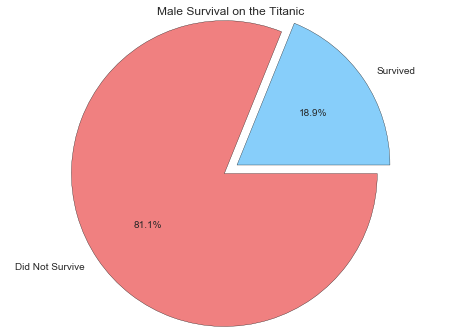

In [10]:
# Males
labels = 'Survived', 'Did Not Survive'
sizes = [gender_survival.mean()['male'], 1.0 - gender_survival.mean()['male']]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) # only "explode" survivors

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Male Survival on the Titanic')

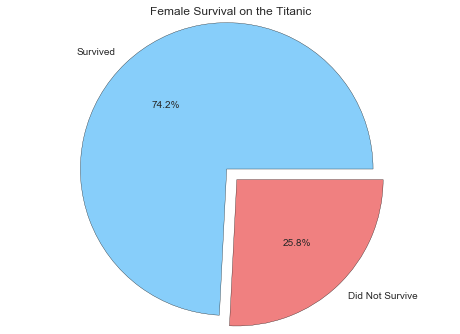

In [11]:
# Females
labels = 'Survived', 'Did Not Survive'
sizes = [gender_survival.mean()['female'], 1.0 - gender_survival.mean()['female']]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) # only "explode" survivors

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Female Survival on the Titanic')

And now the statistical test:

In [12]:
def get_indep_sample_t(groupA, groupB, groupedDataSeries):
    '''Gets the t-statistic for an independent samples t-test.
    groupA, groupB : strings corresponding to the groups in groupedDataSeries
    groupedDataSeries : a pandas "groupby" Series
    '''
    mean_a = groupedDataSeries.mean()[groupA]
    mean_b = groupedDataSeries.mean()[groupB]
    var_a = groupedDataSeries.var()[groupA]
    var_b = groupedDataSeries.var()[groupB]
    n_a = groupedDataSeries.count()[groupA]
    n_b = groupedDataSeries.count()[groupB]
    
    standard_error = np.sqrt(var_a/n_a + var_b/n_b)
    
    t_statistic = (mean_a - mean_b) / standard_error
    return t_statistic

get_indep_sample_t('female', 'male', gender_survival)

18.671833177259167

In [13]:
def get_indep_sample_df(groupA, groupB, groupedDataSeries):
    '''Gets the degrees of freedom for an independent samples t-test.
    groupA, groupB : strings corresponding to the groups in groupedDataSeries
    groupedDataSeries : a pandas "groupby" Series
    '''
    n_a = groupedDataSeries.count()[groupA]
    n_b = groupedDataSeries.count()[groupB]
    return n_a + n_b - 2

get_indep_sample_df('female', 'male', gender_survival)

889

Using the t-table here:
https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg

Our df is 889, which is between the listed 100 and 1000 on the table. Just to be more conservative, I will use the t(100) critical value for a two-tailed test with an alpha level of .05, which is 1.984.

The t-statistic we calculated above is 18.672, which is greater than the t-critical value of 1.984.

Therefore, we can say with 95% confidence (based on our alpha level of .05) that gender made a difference in survival. (And in this case, a person was more likely to survive as a female than as a male).

### Passenger Class

Next, let's look at survival based on passenger class.

In [14]:
class_survival = titanic_data.groupby('Pclass')['Survived']
class_survival.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Right away we can see that 63% of Class 1 passengers survived, 47% of Class 2 passengers survived, and 24% of Class 3 passengers survived. So, it looks like passenger class definitely was definitely correlated with survival, but let's do a closer analysis.

In [15]:
class_survival_counts = titanic_data.groupby(['Pclass', 'Survived'], as_index=False).count()
class_survival_counts

,Pclass,Survived,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,80,80,80,64,80,80,80,80,59,80
1,1,1,136,136,136,122,136,136,136,136,117,134
2,2,0,97,97,97,90,97,97,97,97,3,97
3,2,1,87,87,87,83,87,87,87,87,13,87
4,3,0,372,372,372,270,372,372,372,372,6,372
5,3,1,119,119,119,85,119,119,119,119,6,119


Looking at the counts, it seems that not all columns have complete data, but the PassengerId column looks complete, so we will use it for counting survivors in each passenger class. We will also rename the indices in order to keep track of what is what.

In [16]:
class_survival_counts = class_survival_counts.rename(index={
        0:'Class 1 Non-Survivors',
        1:'Class 1 Survivors',
        2:'Class 2 Non-Survivors',
        3:'Class 2 Survivors',
        4:'Class 3 Non-Survivors',
        5:'Class 3 Survivors',
    })[['Pclass','Survived','PassengerId']]
class_survival_counts

,Pclass,Survived,PassengerId
Class 1 Non-Survivors,1,0,80
Class 1 Survivors,1,1,136
Class 2 Non-Survivors,2,0,97
Class 2 Survivors,2,1,87
Class 3 Non-Survivors,3,0,372
Class 3 Survivors,3,1,119


In [17]:
non_survived_class_counts = class_survival_counts[class_survival_counts['Survived'] == 0]['PassengerId']
survived_class_counts = class_survival_counts[class_survival_counts['Survived'] == 1]['PassengerId']
non_survived_class_percents = non_survived_class_counts / non_survived_class_counts.sum()
survived_class_percents = survived_class_counts / survived_class_counts.sum()
survived_class_percents

Class 1 Survivors    0.397661
Class 2 Survivors    0.254386
Class 3 Survivors    0.347953
Name: PassengerId, dtype: float64

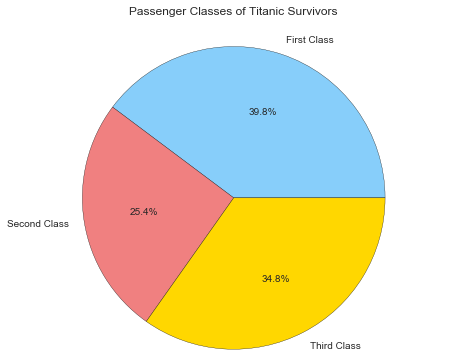

In [18]:
# 2 pie charts (suvived, died) with 3 pieces of pie (class 1, 2, 3)
# Survivor class pie chart
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [survived_class_percents.iloc[0],survived_class_percents.iloc[1],survived_class_percents.iloc[2]]
colors = ['lightskyblue', 'lightcoral', 'gold']
#explode = (0.1, 0.1, 0.1)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Passenger Classes of Titanic Survivors', y=1.08)

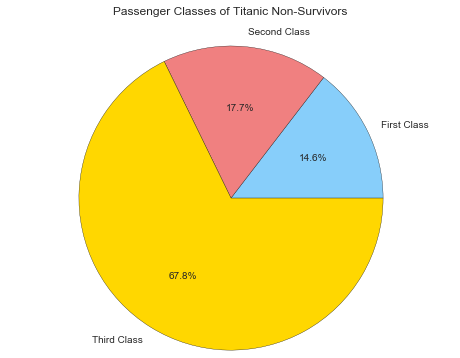

In [19]:
# Non survivor class pie chart
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [non_survived_class_percents.iloc[0],non_survived_class_percents.iloc[1],non_survived_class_percents.iloc[2]]
colors = ['lightskyblue', 'lightcoral', 'gold']
#explode = (0.1, 0.1, 0.1)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Passenger Classes of Titanic Non-Survivors', y=1.08)

It is interesting to see that of the survivors, it appears that there is roughly equal representation from each passenger class, but when looked at from a different angle such as percentage of passengers of each class that survived, first class clearly comes out ahead.

## Conclusion and Discussion of Limitations
So, of the three factors I analyzed (age, gender, and passenger class), age seemed to have the least correlation with survival, while gender and passenger class were definitely linked to survival. Based on this analysis, it would seem that the group most likely to survive would be first class female passengers. So, I suppose the movie *Titanic* was accurate with Rose surviving and Jack not making it.

There are also some limitations on the data that should be noted.

First, this data set has entries for 891 passengers on the Titanic. However, according to [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic), there were 2,224 total passengers and crew. The Kaggle website where the data comes from doesn't give any details as to how the 891 entries were chosen, why the rest are left out, etc. I am assuming that the 891 entries are a random sample and are therefore representative of the 2,224 total.

Next, of the data available, the age data was incomplete. In order to deal with this, I just omitted entries without an age field from consideration. This resulted in a slightly smaller data set which may be less representative of the whole. Alternatively, I could have just filled in the missing values with the mean or median age, for example, and that would result in a larger data set to analyze, but it would introduce values that are most likely erronious to the set.

Finally, more data could have been helpful. For example, one area that would have been interesting to take a closer look at could have been the number of people onboard that each passenger had close relationships with. Were people with a larger onboard network more likely to survive than lone passengers? The data description from Kaggle says that "family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations." So, you may be able to get an idea of whether people with more direct relatives onboard were more likely to survive, but I feel that that would present a rather incomplete view as I imagine there were many people who may not have been directly related to anyone else onboard, but who were otherwise closely anquainted with several other passengers.